In [1]:
# install fastkaggle if not available
try: import fastkaggle
except ModuleNotFoundError:
    !pip install -Uq fastkaggle

from fastkaggle import *

## Getting set up

In [2]:
comp = 'clip-counting-competition-s23'
path = setup_comp(comp, install='')

In [3]:
path, path.ls()

(Path('clip-counting-competition-s23'),
 (#6) [Path('clip-counting-competition-s23/sample_submision.csv'),Path('clip-counting-competition-s23/test_2'),Path('clip-counting-competition-s23/test.csv'),Path('clip-counting-competition-s23/test'),Path('clip-counting-competition-s23/train.csv'),Path('clip-counting-competition-s23/train')])

In [4]:
import pandas as pd
df=pd.read_csv(path/'train.csv')

In [5]:
df['id_tfm'] = df['id'].map(lambda o: 'clips-'+str(o)+'.png')

In [6]:
df

,id,clip_count,id_tfm
0,30001,11,clips-30001.png
1,30002,2,clips-30002.png
2,30003,26,clips-30003.png
3,30004,41,clips-30004.png
4,30005,49,clips-30005.png
...,...,...,...
14995,44996,29,clips-44996.png
14996,44997,1,clips-44997.png
14997,44998,57,clips-44998.png
14998,44999,53,clips-44999.png


## Prepare data 

In [7]:
from fastai.vision.all import *

In [8]:
trn_path = path/'train/train'
files = get_image_files(trn_path).sorted()

In [9]:
files

(#15000) [Path('clip-counting-competition-s23/train/train/clips-30001.png'),Path('clip-counting-competition-s23/train/train/clips-30002.png'),Path('clip-counting-competition-s23/train/train/clips-30003.png'),Path('clip-counting-competition-s23/train/train/clips-30004.png'),Path('clip-counting-competition-s23/train/train/clips-30005.png'),Path('clip-counting-competition-s23/train/train/clips-30006.png'),Path('clip-counting-competition-s23/train/train/clips-30007.png'),Path('clip-counting-competition-s23/train/train/clips-30008.png'),Path('clip-counting-competition-s23/train/train/clips-30009.png'),Path('clip-counting-competition-s23/train/train/clips-30010.png')...]

(256, 256)


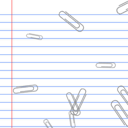

In [10]:
img = PILImage.create(files[0])
print(img.size)
img.to_thumb(128)

In [11]:
import os
os.cpu_count()

12

In [12]:
# from fastcore.parallel import *

# def f(o): return PILImage.create(o).size
# sizes = parallel(f, files, n_workers=6)
# pd.Series(sizes).value_counts()

/home/xy/miniforge3/lib/python3.10/site-packages/fastai/data/transforms.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)


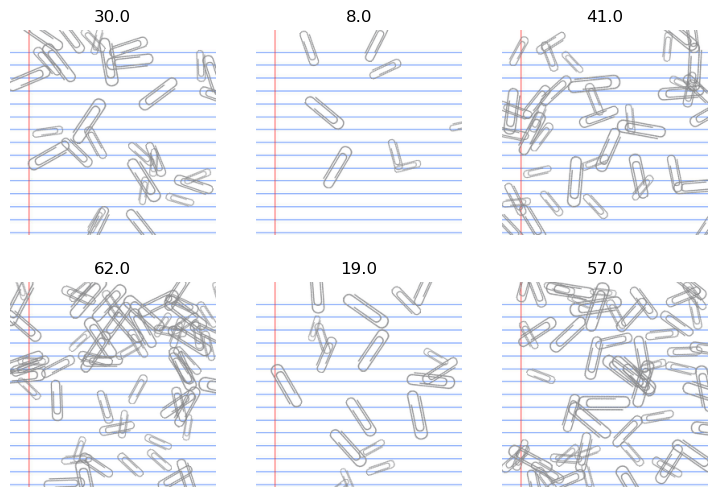

In [13]:
dls = DataBlock(
    blocks=(ImageBlock, RegressionBlock()), 
    splitter=RandomSplitter(valid_pct=0.2),
    get_x=ColReader(2, pref=trn_path),
    get_y=ColReader(1)
).dataloaders(df)

dls.show_batch(max_n=6)

In [14]:
learn = vision_learner(dls, 'resnet18', metrics=mae, path='.').to_fp16()

In [ ]:
learn.lr_find(suggest_funcs=(valley, slide))

In [ ]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time


In [ ]:
import pandas as pd

## Submitting to Kaggle

In [4]:
if not iskaggle:
    from kaggle import api
    api.competition_submit_cli('subm.csv', 'fastai regression', comp)

100%|█████████████████████████████████████████████████████| 70.8k/70.8k [00:00<00:00, 101kB/s]


## Conclusion

## Addendum

In [16]:
if not iskaggle:
    push_notebook('xy', 'count-clip-regression',
                  title='Counting numbers of clips as a regression problem',
                  file='01-first-attempt-fastai.ipynb',
                  competition=comp, private=False, gpu=True)

Your kernel title does not resolve to the specified id. This may result in surprising behavior. We suggest making your title something that resolves to the specified id. See https://en.wikipedia.org/wiki/Clean_URL#Slug for more information on how slugs are determined.
Kernel version 1 successfully pushed.  Please check progress at https://www.kaggle.com/code/xiaochuanyang/counting-numbers-of-clips-as-a-regression-problem
